In [1]:
# globa library
from pandas import read_csv, DataFrame, to_datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

c:\Users\jsgaleano\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# Dataframe
df_datagen = read_csv('../DataGeneración_filo.csv')

In [3]:
print(df_datagen.head())

                 Fecha        kWh
0  2021-01-01 00:00:00  353483.09
1  2021-01-01 01:00:00  387809.23
2  2021-01-01 02:00:00  385176.88
3  2021-01-01 03:00:00  372592.99
4  2021-01-01 04:00:00  368292.48


In [4]:
df_datagen.index = to_datetime(df_datagen['Fecha'])
del df_datagen['Fecha']


In [5]:
print(df_datagen.head())

                           kWh
Fecha                         
2021-01-01 00:00:00  353483.09
2021-01-01 01:00:00  387809.23
2021-01-01 02:00:00  385176.88
2021-01-01 03:00:00  372592.99
2021-01-01 04:00:00  368292.48


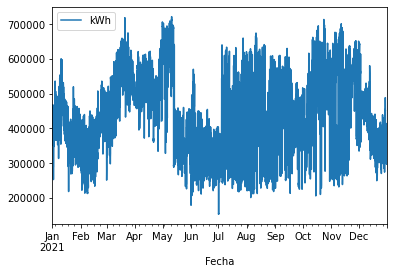

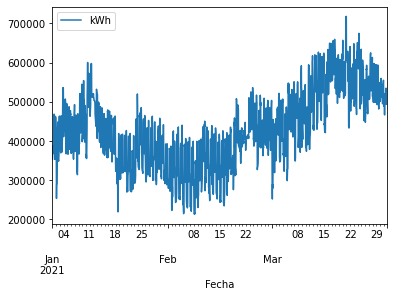

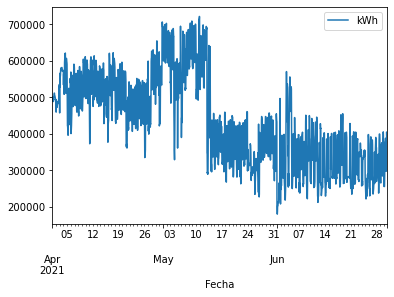

In [6]:
#Separación Datos primer y segundo trimestre
df_trim_1 = df_datagen.loc[(df_datagen.index >= '2021-01-01') & (df_datagen.index < '2021-04-01')]
df_trim_2 = df_datagen.loc[(df_datagen.index >= '2021-04-01') & (df_datagen.index < '2021-07-01')]

df_datagen.plot()
df_trim_1.plot()
df_trim_2.plot()

In [11]:
#Se ajustan los datos que estaban horarios al promedio por día
df_datagen_day = df_datagen.resample("d").mean()
df_trim_1_day = df_trim_1.resample("d").mean()
df_trim_2_day = df_trim_2.resample("d").mean()

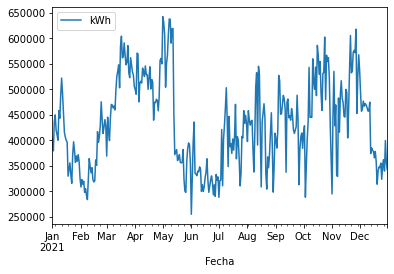

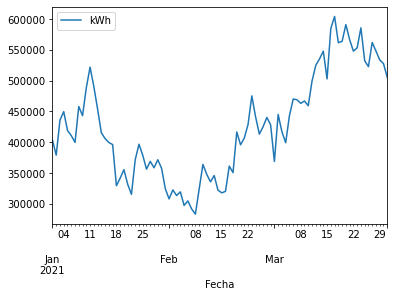

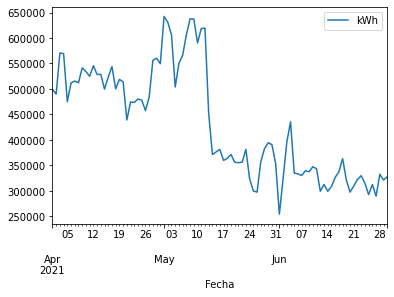

In [12]:
df_datagen_day.plot()
df_trim_1_day.plot()
df_trim_2_day.plot()

# Stationarity

In [13]:
rolling_mean = df_datagen_day.rolling(7).mean()
rolling_std = df_datagen_day.rolling(7).std()

#Estacionaridad trimestre 1 

rolling_mean_trim_1 = df_trim_1_day.rolling(7).mean()
rolling_std_trim_1 = df_trim_1_day.rolling(7).std()

#Estacionaridad trimestre 2 

rolling_mean_trim_2 = df_trim_2_day.rolling(7).mean()
rolling_std_trim_2 = df_trim_2_day.rolling(7).std()

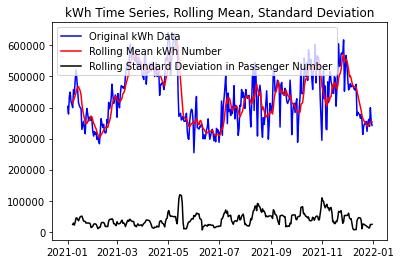

In [14]:
#Plot estacionariedad datos todo el año

plt.plot(df_datagen_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

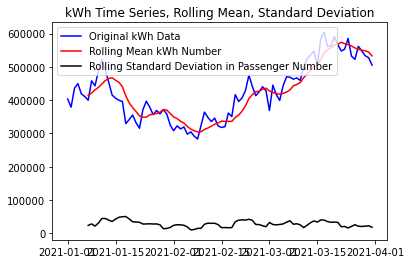

In [15]:
#Plot estacionariedad datos trimestre 1

plt.plot(df_trim_1_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean_trim_1, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std_trim_1, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

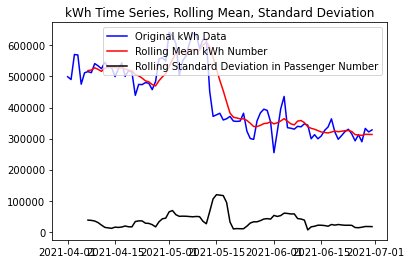

In [16]:
#Plot estacionariedad datos trimestre 2

plt.plot(df_trim_2_day, color="blue",label="Original kWh Data")
plt.plot(rolling_mean_trim_2, color="red", label="Rolling Mean kWh Number")
plt.plot(rolling_std_trim_2, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("kWh Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

In [17]:
adft = adfuller(df_datagen_day,autolag="AIC")
adft_trim_1 = adfuller(df_trim_1_day,autolag="AIC")
adft_trim_2 = adfuller(df_trim_2_day,autolag="AIC")

In [20]:
output_df = DataFrame(
        {"Values":[
            adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

output_df_trim_1 = DataFrame(
        {"Values":[
            adft_trim_1[0],adft_trim_1[1],adft_trim_1[2],adft_trim_1[3], adft_trim_1[4]['1%'], adft_trim_1[4]['5%'], adft_trim_1[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

output_df_trim_2 = DataFrame(
        {"Values":[
            adft_trim_2[0],adft_trim_2[1],adft_trim_2[2],adft_trim_2[3], adft_trim_2[4]['1%'], adft_trim_2[4]['5%'], adft_trim_2[4]['10%']
            ], 
        "Metric":["Test Statistics","p-value","No. of lags used",
        "Number of observations used", 
        "critical value (1%)", "critical value (5%)", "critical value (10%)"]
        }
    )

In [21]:
print(output_df)
print(output_df_trim_1)
print(output_df_trim_2)

       Values                       Metric
0   -2.879825              Test Statistics
1    0.047745                      p-value
2    4.000000             No. of lags used
3  360.000000  Number of observations used
4   -3.448646          critical value (1%)
5   -2.869602          critical value (5%)
6   -2.571065         critical value (10%)
      Values                       Metric
0  -1.223690              Test Statistics
1   0.663323                      p-value
2   4.000000             No. of lags used
3  85.000000  Number of observations used
4  -3.509736          critical value (1%)
5  -2.896195          critical value (5%)
6  -2.585258         critical value (10%)
      Values                       Metric
0  -1.725926              Test Statistics
1   0.417807                      p-value
2   0.000000             No. of lags used
3  90.000000  Number of observations used
4  -3.505190          critical value (1%)
5  -2.894232          critical value (5%)
6  -2.584210         criti

# Autocorrelation

In [14]:
autocorrelation_lag1 = df_datagen_day['kWh'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)

One Day Lag:  0.8342909421320023


In [15]:
day=3
autocorrelation_lag9 = df_datagen_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag: ", autocorrelation_lag9)

3 Day Lag:  0.6968223579754946


In [22]:
#Autocorrelación trimestre 1
autocorrelation_lag1_trim_1 = df_trim_1_day['kWh'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1_trim_1)

day=3
autocorrelation_lag3_trim_1 = df_trim_1_day['kWh'].autocorr(lag=day)
print(f"{day} Day Lag: ", autocorrelation_lag3_trim_1)


One Day Lag:  0.9376625159184548
3 Day Lag:  0.8758174413556042


# Decomposition

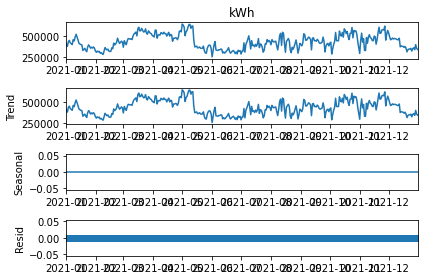

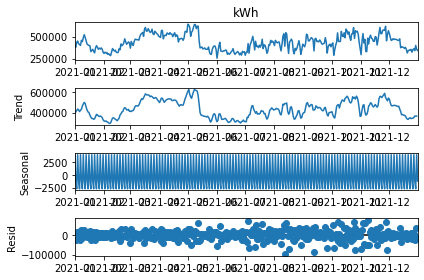

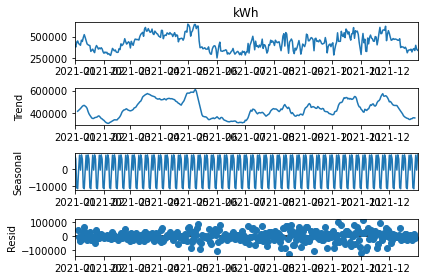

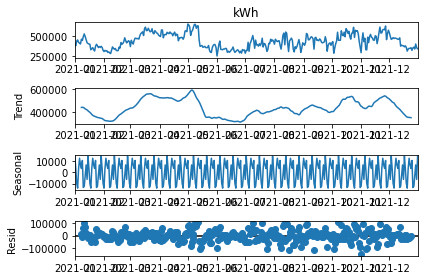

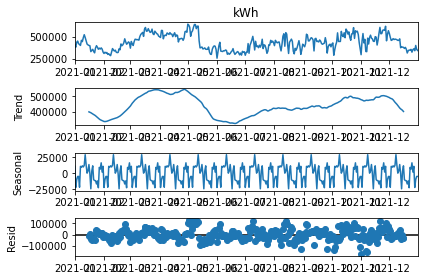

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

periodos = [1,3,7,14,30]
for periodo in periodos:
    decompose = seasonal_decompose(df_datagen_day['kWh'],model='additive', period=periodo )
    decompose.plot()
    #plt.title('Seasonal Decomposition for:' + str(periodo/24) + ' dias')
    plt.show()

# DECOMPOSITION FIRST AN THIRD SEMESTER

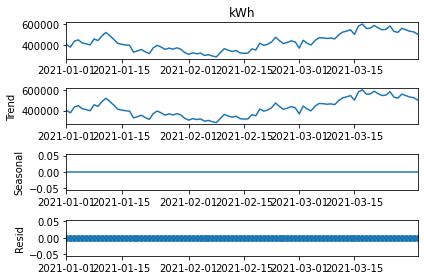

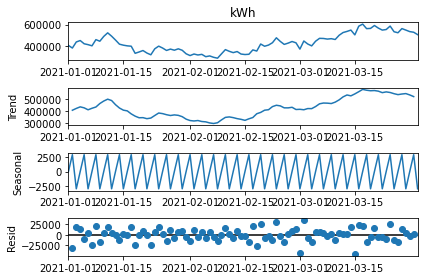

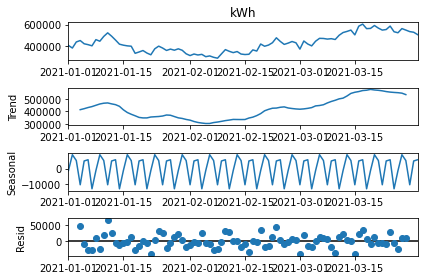

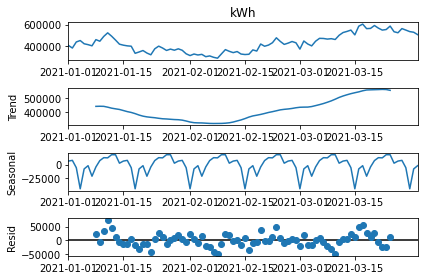

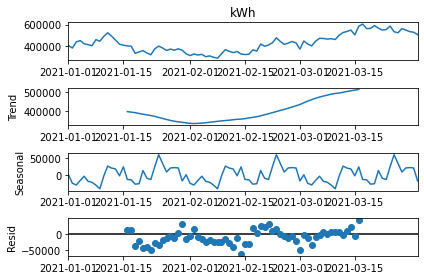

In [24]:
#PRIMER TRIMESTRE

periodos = [1,3,7,14,30]
for periodo in periodos:
    decompose = seasonal_decompose(df_trim_1_day['kWh'],model='additive', period=periodo )
    decompose.plot()
    #plt.title('Seasonal Decomposition for:' + str(periodo/24) + ' dias')
    plt.show()

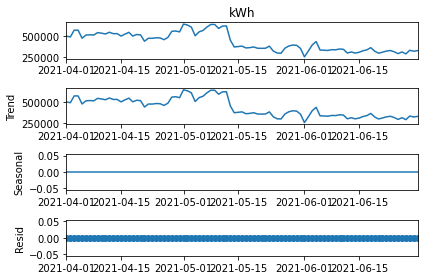

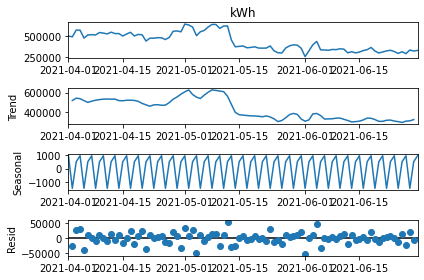

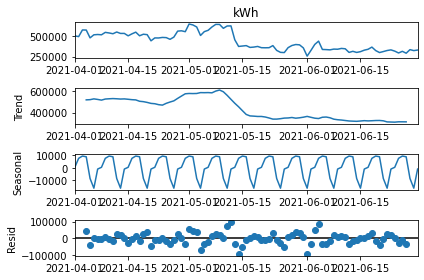

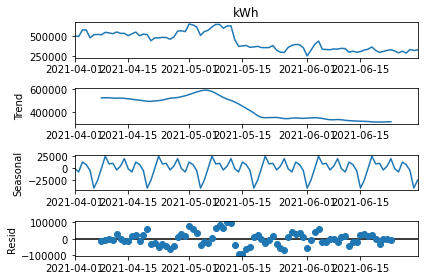

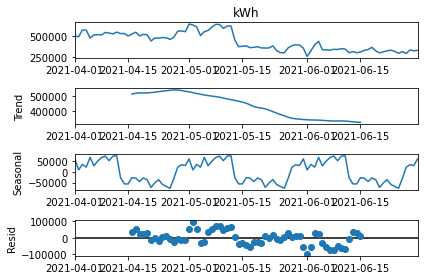

In [25]:
#SEGUNDO TRIMESTRE

periodos = [1,3,7,14,30]
for periodo in periodos:
    decompose = seasonal_decompose(df_trim_2_day['kWh'],model='additive', period=periodo )
    decompose.plot()
    #plt.title('Seasonal Decomposition for:' + str(periodo/24) + ' dias')
    plt.show()

# Forecasting

<ipython-input-28-8995df83b95b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_trim_1['train'] = train_trim_1['kWh']
<ipython-input-28-8995df83b95b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_trim_1['test'] = test_trim_1['kWh']


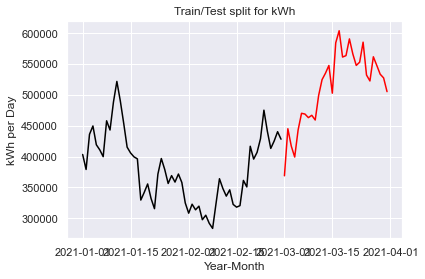

In [28]:
import pandas as pd
import seaborn as sns


#PRIMER TRIMESTRE
df_trim_1_day['Date'] = df_trim_1_day.index
train_trim_1 = df_trim_1_day[df_trim_1_day['Date'] < pd.to_datetime("2021-03", format='%Y-%m')]
train_trim_1['train'] = train_trim_1['kWh']
del train_trim_1['Date']
del train_trim_1['kWh']
test_trim_1 = df_trim_1_day[df_trim_1_day['Date'] >= pd.to_datetime("2021-03", format='%Y-%m')]
del test_trim_1['Date']
test_trim_1['test'] = test_trim_1['kWh']
del test_trim_1['kWh']
plt.plot(train_trim_1, color = "black")
plt.plot(test_trim_1, color = "red")
plt.title("Train/Test split for kWh")
plt.ylabel("kWh per Day")
plt.xlabel('Year-Month')
sns.set()
plt.show()

<ipython-input-37-0afd2ca30722>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_trim_2['train'] = train_trim_2['kWh']
<ipython-input-37-0afd2ca30722>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_trim_2['test'] = test_trim_2['kWh']


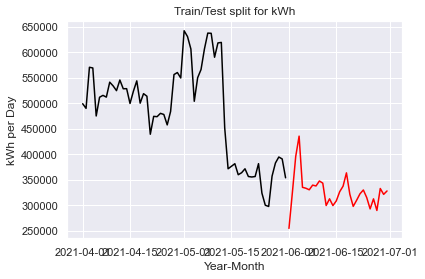

In [37]:
#SEGUNDO TRIMESTRE

df_trim_2_day['Date'] = df_trim_2_day.index
train_trim_2 = df_trim_2_day[df_trim_2_day['Date'] < pd.to_datetime("2021-06", format='%Y-%m')]
train_trim_2['train'] = train_trim_2['kWh']
del train_trim_2['Date']
del train_trim_2['kWh']
test_trim_2 = df_trim_2_day[df_trim_2_day['Date'] >= pd.to_datetime("2021-06", format='%Y-%m')]
del test_trim_2['Date']
test_trim_2['test'] = test_trim_2['kWh']
del test_trim_2['kWh']
plt.plot(train_trim_2, color = "black")
plt.plot(test_trim_2, color = "red")
plt.title("Train/Test split for kWh")
plt.ylabel("kWh per Day")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [67]:
from pmdarima.arima import auto_arima

#TRIMESTRE 1

model_trim_1 = auto_arima(train_trim_1, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True,method='nm',
 m=52, stepwise=True)
model_trim_1.fit(train_trim_1)
forecast_trim_1 = model_trim_1.predict(n_periods=len(test_trim_1))
forecast_trim_1 = pd.DataFrame(forecast_trim_1,index = test_trim_1.index,columns=['Prediction'])

c:\Users\jsgaleano\Anaconda3\lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (7) is shorter than m (52). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[52] intercept   : AIC=184.515, Time=1.64 sec
 ARIMA(0,0,0)(0,1,0)[52] intercept   : AIC=171.107, Time=0.35 sec
 ARIMA(1,0,0)(1,1,0)[52] intercept   : AIC=175.069, Time=1.06 sec
 ARIMA(0,0,1)(0,1,1)[52] intercept   : AIC=175.161, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[52]             : AIC=171.241, Time=0.21 sec
 ARIMA(0,0,0)(1,1,0)[52] intercept   : AIC=170.578, Time=0.98 sec
 ARIMA(0,0,0)(2,1,0)[52] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,0,0)(1,1,1)[52] intercept   : AIC=172.438, Time=1.22 sec
 ARIMA(0,0,0)(0,1,1)[52] intercept   : AIC=170.530, Time=1.57 sec
 ARIMA(0,0,0)(0,1,2)[52] intercept   : AIC=173.013, Time=3.47 sec
 ARIMA(0,0,0)(1,1,2)[52] intercept   : AIC=175.447, Time=3.28 sec
 ARIMA(1,0,0)(0,1,1)[52] intercept   : AIC=175.095, Time=1.41 sec
 ARIMA(1,0,1)(0,1,1)[52] intercept   : AIC=178.394, Time=1.25 sec
 ARIMA(0,0,0)(0,1,1)[52]             : AIC=171.497, Time=1.83 sec

Best model:  ARIMA(0,0,0)(0,1,1)[52]

In [69]:
#TRIMESTRE 2
model_trim_2 = auto_arima(train_trim_2, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True,method='nm',
 m=30, stepwise=True)
model_trim_2.fit(train_trim_2)
forecast_trim_2 = model_trim_2.predict(n_periods=len(test_trim_2))
forecast_trim_2 = pd.DataFrame(forecast_trim_2,index = test_trim_2.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[30] intercept   : AIC=1466.890, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1453.513, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1454.350, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=1457.315, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1451.706, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[30] intercept   : AIC=1451.835, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=1451.223, Time=0.20 sec
 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=1454.300, Time=0.22 sec
 ARIMA(0,1,0)(0,0,2)[30] intercept   : AIC=1454.071, Time=0.46 sec
 ARIMA(0,1,0)(1,0,2)[30] intercept   : AIC=1457.022, Time=0.59 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=1454.598, Time=0.16 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=1459.477, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[30]             : AIC=1449.664, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[30]             : AIC=1452.043, Time=0.21 sec
 ARIMA(0,1,0)(0,0,2

In [34]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#TRIMESTRE 1
rms_trim_1 = sqrt(mean_squared_error(test_trim_1,forecast_trim_1))
print("RMSE: ", rms_trim_1)
#TRIMESTRE 2
rms_trim_2 = sqrt(mean_squared_error(test_trim_2,forecast_trim_2))
print("RMSE: ", rms_trim_2)

RMSE:  137165.62689335807
RMSE:  41968.13498968758


In [65]:
forecast_trim_1.head()


,Prediction
Fecha,
2021-03-01,422542.833353
2021-03-02,417768.952524
2021-03-03,413629.233776
2021-03-04,410039.435051
2021-03-05,406926.505002


In [61]:
forecast_trim_2.head()

,Prediction
Fecha,
2021-06-01,352111.087229
2021-06-02,345677.026601
2021-06-03,328259.061836
2021-06-04,338789.790635
2021-06-05,340485.604267


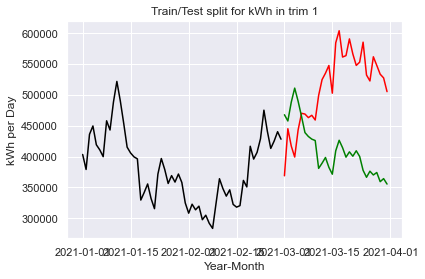

In [70]:
#PLOT TRIM 1
plt.plot(train_trim_1, color = "black")
plt.plot(test_trim_1, color = "red")
plt.plot(forecast_trim_1, color = "green")
plt.title("Train/Test split for kWh in trim 1")
plt.ylabel("kWh per Day")
plt.xlabel('Year-Month')
sns.set()
plt.show()

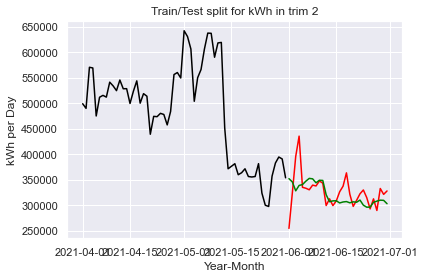

In [71]:
#PLOT TRIM 2
plt.plot(train_trim_2, color = "black")
plt.plot(test_trim_2, color = "red")
plt.plot(forecast_trim_2, color = "green")
plt.title("Train/Test split for kWh in trim 2")
plt.ylabel("kWh per Day")
plt.xlabel('Year-Month')
sns.set()
plt.show()